In [5]:
using Pkg
#add these packages if they aren't installed already
#Pkg.add("LinearAlgebra")
#Pkg.add("HiGHS")
#Pkg.add("XLSX")
using LinearAlgebra
using JuMP
using HiGHS
import XLSX


xfa=XLSX.readxlsx("unallocatedA.xlsx")
asheet=xfa["Sheet 1"];
A=asheet["B2:AY37"];
procnames=asheet["B1:AY1"]
xfb=XLSX.readxlsx("unallocatedB.xlsx")
bsheet=xfb["Sheet 1"];
B=bsheet["B2:AY12"]
xff=XLSX.readxlsx("Finaldemand.xlsx")
fsheet=xff["Sheet1"];
f=fsheet["B2:B37"]


print(size(A))
print(size(B))

fakeA=zeros(Float64, 36, 50)
for i in 1:36
    for j in 1:50
        fakeA[i,j]=convert(Float64, A[i,j])
    end
end


fakeB=zeros(Float64, 11, 50)
for i in 1:11
    for j in 1:50
        fakeB[i,j]=convert(Float64, B[i,j])
    end
end

fakef=zeros(Float64, 36)
for i in 1:36
    fakef[i]=convert(Float64, f[i, 1])
end

f=fakef

vector_model = Model(HiGHS.Optimizer)
@variable(vector_model,0 <= x[1:50] <= 1000) #row vector of scaling factors
#@constraint(vector_model, x[28] <= 6)
for i in 1:36
    @constraint(vector_model, dot(fakeA[i,:],x) >= f[i])
end
#@constraint(vector_model, dot(fakeA[24,:],x) == 0)
#demand of PET is zero
for i in 1:36 #stock of no product can be negative
    @constraint(vector_model, dot(fakeA[i,:],x) >= 0)
end
#@constraint(vector_model, fakeA[24,21]*x[21]+fakeA[24,50]*x[50] == 1)
@objective(vector_model, Min, dot(fakeB[3,:],x)+dot(fakeB[4,:],x)+dot(fakeB[9,:],x))
#print(vector_model)
optimize!(vector_model)
#@show termination_status(vector_model) #why the solver stopped
amts=value.(vector_model[:x]);
println("-------------------------------------")
petamt=0
for i in 1:50
    petamt=petamt+fakeA[24,i]*amts[i]
end
print("PET produced: ")
println(petamt)
println("-------------------------------------")
for i in 1:50
    print(procnames[i])
    print(":")
    print(amts[i])
    println()
end

(36, 50)(11, 50)Presolving model
29 rows, 35 cols, 165 nonzeros
12 rows, 30 cols, 69 nonzeros
12 rows, 30 cols, 69 nonzeros
Presolve : Reductions: rows 12(-60); columns 30(-20); elements 69(-181)
Solving the presolved LP
Using EKK dual simplex solver - serial
  Iteration        Objective     Infeasibilities num(sum)
          0     0.0000000000e+00 Ph1: 0(0) 0s
          8    -3.7497524621e+04 Pr: 0(0) 0s
Solving the original LP from the solution after postsolve
Model   status      : Optimal
Simplex   iterations: 8
Objective value     : -3.7497524621e+04
HiGHS run time      :          0.01
-------------------------------------
PET produced: 0.0
-------------------------------------
Syngas Production:0.0
Conventional methanol synthesis:0.0
Steam Cracker:1.0
Hydrodealkylation (THD):0.0
Disproportionation (TDP):0.0
Metathesis:2.1477192981303976
Dehydrogenation:0.0
Refinery:1000.0
Urea Synthesis:1.0
SOHIO Process:1.0
Caprolactam Manufacture:1.0
Cumene Production:1.0
Hock's Process:1.0
PE M

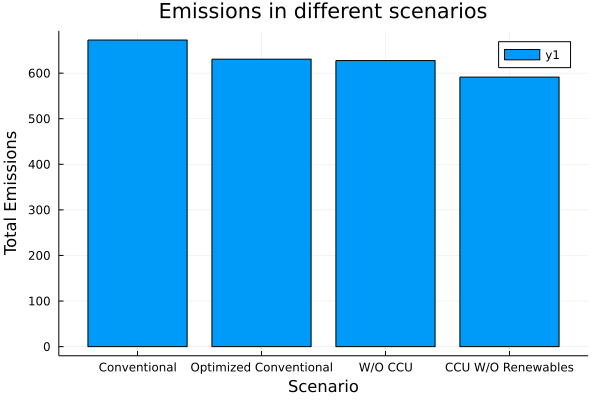

In [19]:
using Plots
p = bar(["Conventional","Optimized Conventional", "W/O CCU", "CCU W/O Renewables"],[672.5702964697915, 6.3065046306e+02, 6.2751803127e+02, 5.9126456705e+02])
ylabel!("Total Emissions")
xlabel!("Scenario")
title!("Emissions in different scenarios")
#[1.0 0.0; 1.0 0.0; 1.0 1.0; 1.0 1.1163875646890271; 1.0 0.0; 1.0 0.0; 1.0 0.0; 1.0 0.0; 1.0 1.0; 1.0 0.0; 1.0 0.0; 1.0 0.0; 1.0 13.313804338741283; 1.0 0.0; 1.0 13.313804338741283; 1.0 -0.0; 1.0 1.0; 1.0 1.0; 1.0 1.0; 1.0 1.0000000000000002; 1.0 1.0; 1.0 1.0; 1.0 1.0; 1.0 1.0; 1.0 1.0; 1.0 1.0; 1.0 1.0; 1.0 1.0; 1.0 1.0; 1.0 1.0; 1.0 1.0; 1.0 1.0; 1.0 1.0; 1.0 0.9999999999999998; 1.0 1.0; 1.0 0.9270200733095508; 1.0 3.103109539857492; 1.0 1.1929601832637573; 1.0 1.0]

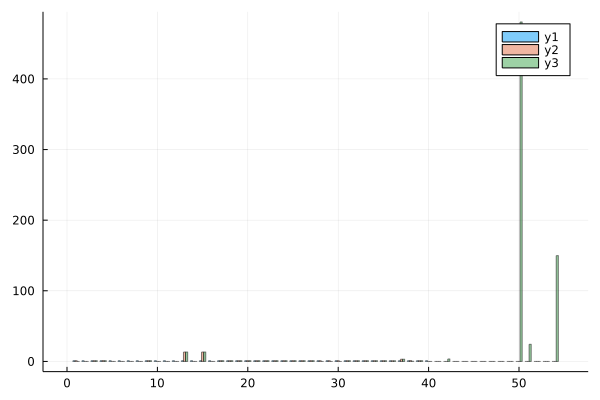

In [14]:
convdes=[1.0, 0.0, 1.0, 1.1163875646890271, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 13.313804338741283, 0.0, 13.313804338741283, -0.0, 1.0, 1.0, 1.0, 1.0000000000000002, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9999999999999998, 1.0, 0.9270200733095508, 3.103109539857492, 1.1929601832637573, 1.0, 0.0]
deswoccu=[0.0, 0.0, 1.0, 0.9952281443573913, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 13.313804338741283, 0.0, 13.313804338741283, -0.0, 1.0, 1.0, 1.0, 1.0000000000000002, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9999999997903565, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.9999999999999998, 1.0, 0.9270200732521464, 3.1031095380696985, 0.25118990845272854, 1.0000000001665739, 0.0, 0.0, 3.470708429819503, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 480.56998467284535, 24.288678436252805, 0.0, 0.0, 149.831232598739]
reg=[]
for i in 1:40
    push!(reg,1)
end
for i in 40:54
    push!(reg, 0)
    push!(convdes, 0)
end
dat=[]
for i in 1:54
    newdats=[reg[i], convdes[i], deswoccu[i]]
    push!(dat,newdats)
end

dat=mapreduce(permutedims, vcat, dat);
using StatsPlots
groupedbar(dat, bar_position = :dodge, bar_width=0.7, alpha=0.5)

In [ ]:
reg=[]
for i in 1:40
    push!(reg,1)
end
for i in 40:50
    push!(reg, 0)
end
dat=[]
for i in 1:50
    newdats=[reg[i], amts[i]]
    push!(dat,newdats)
end
dat=mapreduce(permutedims, vcat, dat);
using StatsPlots
groupedbar(dat, bar_position = :dodge, bar_width=0.7, alpha=0.5)